In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud

In [2]:
data = pd.read_csv('dataset/train.csv')

In [3]:
data

,id,document,label
0,1,영상이나 음악이 이쁘다 해도 미화시킨 불륜일뿐,0
1,2,히치콕이 이 영화를 봤다면 분명 박수를 쳤을듯...,1
2,3,괜찮은 음악영화가 또 나왔군요!!! 따뜻한 겨울이 될 것 같아요~,1
3,4,아무래도 20년도지난작품이라 지금보기는너무유치하다,0
4,5,지금까지의 영화들이 그랬듯. 이 영화역시 일본에 대한 미화는 여전하다.,0
...,...,...,...
4995,4996,좋은 배우들로 3류영화를 찍은 안타까운 영화,0
4996,4997,진짜 드럽게 재미없다 에드워드 호퍼 그림에 배경 빼고는 볼게 아닌영화,0
4997,4998,가장 실망스러운 영화.. 지금까지 본영화중..,0
4998,4999,"이런 평점 테러, 네이버에서 좀 막아야 하는 것 아닌가?",1


,id,document,label
0,1,영상이나 음악이 이쁘다 해도 미화시킨 불륜일뿐,0
1,2,히치콕이 이 영화를 봤다면 분명 박수를 쳤을듯...,1
2,3,괜찮은 음악영화가 또 나왔군요!!! 따뜻한 겨울이 될 것 같아요~,1
3,4,아무래도 20년도지난작품이라 지금보기는너무유치하다,0
4,5,지금까지의 영화들이 그랬듯. 이 영화역시 일본에 대한 미화는 여전하다.,0
...,...,...,...
4995,4996,좋은 배우들로 3류영화를 찍은 안타까운 영화,0
4996,4997,진짜 드럽게 재미없다 에드워드 호퍼 그림에 배경 빼고는 볼게 아닌영화,0
4997,4998,가장 실망스러운 영화.. 지금까지 본영화중..,0
4998,4999,"이런 평점 테러, 네이버에서 좀 막아야 하는 것 아닌가?",1


### 결측치 확인
- 결측치가 없는 깔끔한 데이터셋

In [4]:
def check_missing_col(dataframe):
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'해당 칼럼에 총 {missing_values}개의 결측치가 존재합니다')
            missing_col.append([col, dataframe[col].dtype])
        
    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(data)

결측치가 존재하지 않습니다
결측치가 존재하지 않습니다


### 기초통계분석

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        5000 non-null   int64 
 1   document  5000 non-null   object
 2   label     5000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 117.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        5000 non-null   int64 
 1   document  5000 non-null   object
 2   label     5000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 117.3+ KB


### 긍정/부정 리뷰 비율 확인

In [6]:
val_count = data['label'].value_counts()
print('라벨 0인 리뷰 개수:', val_count[0])
print('라벨 1인 리뷰 개수:', val_count[1])

라벨 0인 리뷰 개수: 2564
라벨 1인 리뷰 개수: 2436
라벨 0인 리뷰 개수: 2564
라벨 1인 리뷰 개수: 2436


### 데이터 시각화
- 두 라벨의 분포가 비슷함

In [7]:
plt.style.use("ggplot")

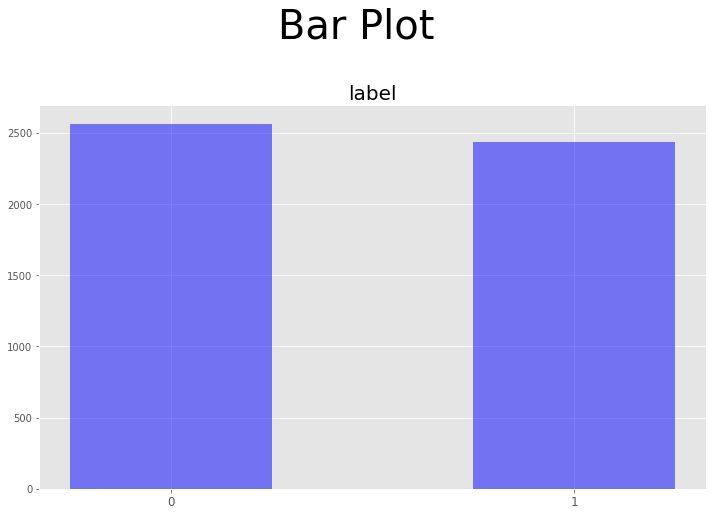

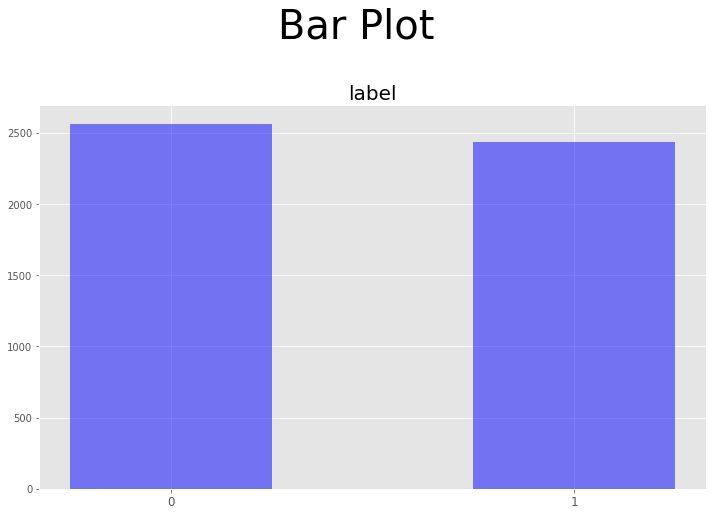

In [8]:
feature = data['label']

plt.figure(figsize=(10,7.5))
plt.suptitle("Bar Plot", fontsize=40)

plt.title('label', fontsize=20)
temp = feature.value_counts()
plt.bar(temp.keys(), temp.values, width=0.5, color='b',alpha=0.5)
plt.xticks(temp.keys(), fontsize=12)
plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()

### 리뷰 길이 확인

In [9]:
str_len_mean = np.mean(data['document'].str.len())
print('리뷰의 평균 길이 :', str_len_mean)

리뷰의 평균 길이 : 27.1352
리뷰의 평균 길이 : 27.1352


### 전체리뷰 / 긍정리뷰 / 부정리뷰 비교
- 문자열 길이는 15~45 사이에 분포
- 대체적으로 길이가 짧을수록 빈도수가 더 높은 것을 확인 
- 긍정/부정 데이터에 상관없이 리뷰의 길이는 비슷한 분포

In [10]:
mask_pos = (data.label == 1)
mask_neg = (data.label == 0)

df_train = data.document.copy() # 전체 train 데이터
df_pos = data.loc[mask_pos, :].document # 긍정 리뷰에만 해당하는 train 데이터
df_neg = data.loc[mask_neg, :].document # 부정 리뷰에만 해당하는 train 데이터

compare = [df_train, df_pos, df_neg]

In [11]:
df_pos.head() # 긍정 데이터 확인하기

1            히치콕이 이 영화를 봤다면 분명 박수를 쳤을듯...
2    괜찮은 음악영화가 또 나왔군요!!! 따뜻한 겨울이 될 것 같아요~
5       내인생에 있어 손까락에 꼽히는 영화 원작을 능가한 리메이크작
7          마음이 성숙하고 보면 다르게 보이는 영화.. 걸작이다.
8                   가슴 찡했던, 오래 기억에남을 영화!!
Name: document, dtype: object

1            히치콕이 이 영화를 봤다면 분명 박수를 쳤을듯...
2    괜찮은 음악영화가 또 나왔군요!!! 따뜻한 겨울이 될 것 같아요~
5       내인생에 있어 손까락에 꼽히는 영화 원작을 능가한 리메이크작
7          마음이 성숙하고 보면 다르게 보이는 영화.. 걸작이다.
8                   가슴 찡했던, 오래 기억에남을 영화!!
Name: document, dtype: object

In [12]:
df_neg.head()

0                  영상이나 음악이 이쁘다 해도 미화시킨 불륜일뿐
3                아무래도 20년도지난작품이라 지금보기는너무유치하다
4    지금까지의 영화들이 그랬듯. 이 영화역시 일본에 대한 미화는 여전하다.
6                성룡영화중 최악 .. 차라리 러시아워가 훨씬 나음
9                   결말 기분나쁘다 공포매니아에게 이따위 결말을
Name: document, dtype: object

0                  영상이나 음악이 이쁘다 해도 미화시킨 불륜일뿐
3                아무래도 20년도지난작품이라 지금보기는너무유치하다
4    지금까지의 영화들이 그랬듯. 이 영화역시 일본에 대한 미화는 여전하다.
6                성룡영화중 최악 .. 차라리 러시아워가 훨씬 나음
9                   결말 기분나쁘다 공포매니아에게 이따위 결말을
Name: document, dtype: object

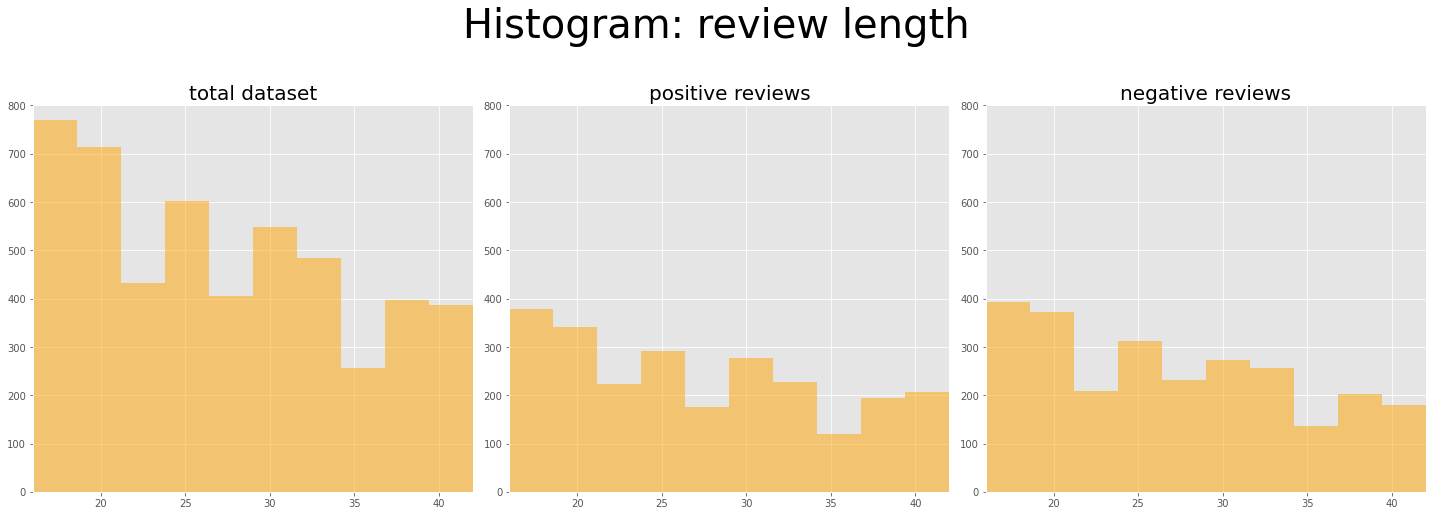

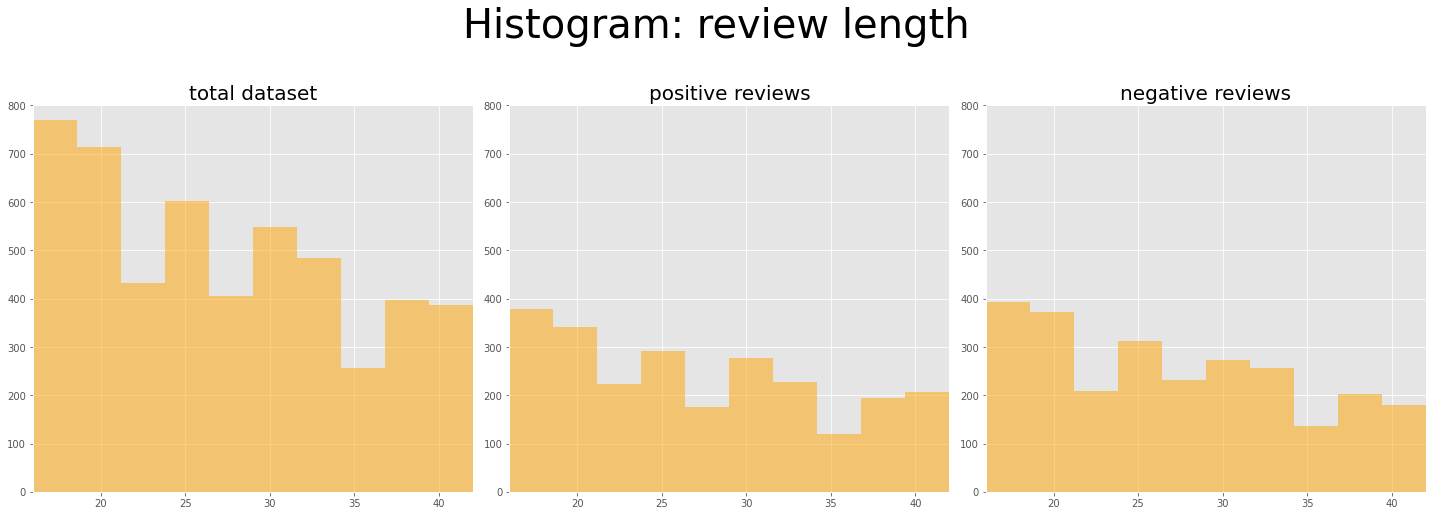

In [13]:
plt.figure(figsize=(20, 7.5))
plt.suptitle("Histogram: review length", fontsize=40)
name = ['total dataset', 'positive reviews', 'negative reviews']

for i in range(len(compare)):
    document = compare[i]
    string_len = [len(x) for x in document]
    plt.subplot(1, 3, i+1) # 행 개수 / 열 개수 /해당 그래프 표시 순서
    plt.title(name[i], fontsize=20)
    plt.axis([16, 42, 0, 800]) # x축 시작, 끝 / y축 시작, 끝
    plt.hist(string_len, alpha=0.5, color='orange')

plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()

띄어쓰기를 기준으로 각 리뷰 당 포함하는 어절(word) 수 확인
- 4~6개의 어절로 이루어진 리뷰가 가장 많은 것을 확인
- 분포는 마찬가지로 세 데이터셋이 거의 동일 

In [14]:
word_split = data['document'].str.split() # 공백을 기준으로 문자열 분리
word_split[:5] # 상위 5개 값 확인

0                     [영상이나, 음악이, 이쁘다, 해도, 미화시킨, 불륜일뿐]
1                 [히치콕이, 이, 영화를, 봤다면, 분명, 박수를, 쳤을듯...]
2       [괜찮은, 음악영화가, 또, 나왔군요!!!, 따뜻한, 겨울이, 될, 것, 같아요~]
3                      [아무래도, 20년도지난작품이라, 지금보기는너무유치하다]
4    [지금까지의, 영화들이, 그랬듯., 이, 영화역시, 일본에, 대한, 미화는, 여전하다.]
Name: document, dtype: object

0                     [영상이나, 음악이, 이쁘다, 해도, 미화시킨, 불륜일뿐]
1                 [히치콕이, 이, 영화를, 봤다면, 분명, 박수를, 쳤을듯...]
2       [괜찮은, 음악영화가, 또, 나왔군요!!!, 따뜻한, 겨울이, 될, 것, 같아요~]
3                      [아무래도, 20년도지난작품이라, 지금보기는너무유치하다]
4    [지금까지의, 영화들이, 그랬듯., 이, 영화역시, 일본에, 대한, 미화는, 여전하다.]
Name: document, dtype: object

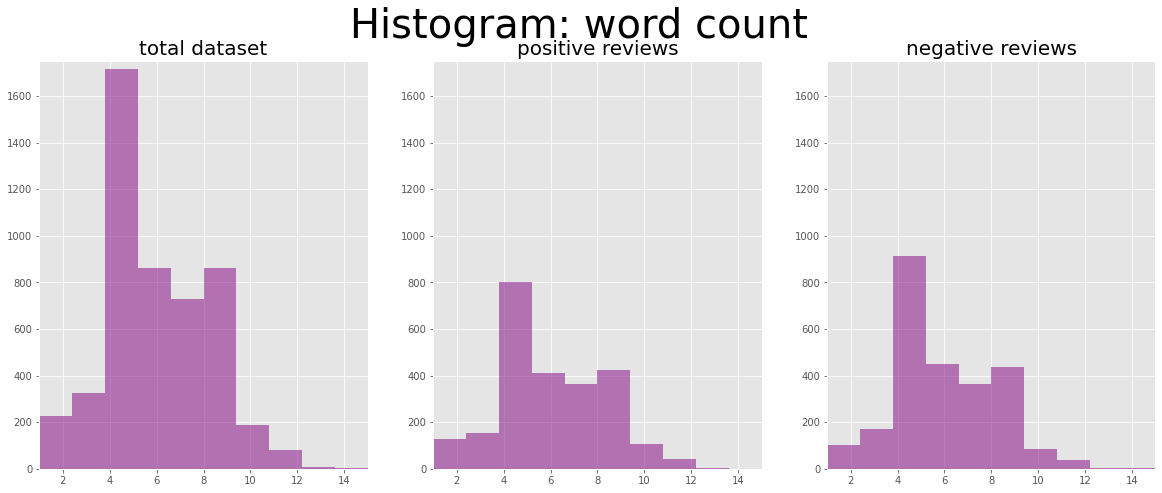

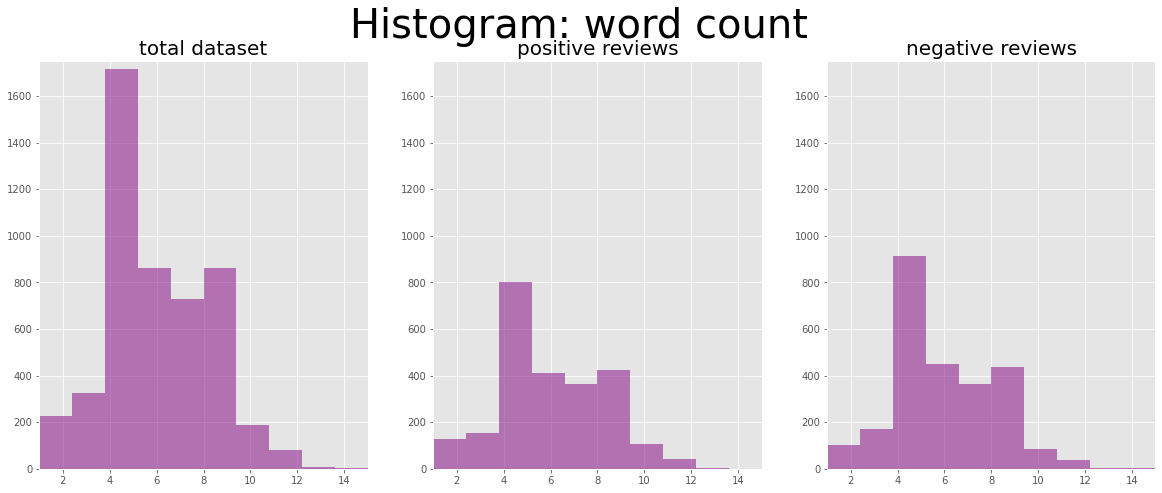

In [15]:
plt.figure(figsize=(20,7.5))
plt.suptitle("Histogram: word count", fontsize =40)
name = ["total dataset", 'positive reviews', 'negative reviews'] 

for i in range(len(compare)):
    document = compare[i]
    split = document.str.split()
    split_len = [len(x) for x in split]
    plt.subplot(1,3,i+1)
    plt.title(name[i], fontsize=20)
    plt.axis([1,15,0,1750])
    plt.hist(split_len, alpha=0.5, color='purple')

### Word Cloud
- 워드 클라우드란? 


태그 클라우드와 동의어인 워드 클라우드는 문서의 키워드 등을 직관적으로 파악할 수 있도록 하는 시각화 기법


예를 들어, 문서에 자주 언급된 단어일수록 크게 시각화하여 문서에서 등장하는 주요 단어들을 한눈에 파악할 수 있습니다. 

### 기본 함수 정의
- 워드 클라우드 생성하기 위한 패키지를 불로오고 기본 함수들을 정의합니다

In [16]:
def df2str(df):
    # 전체 리뷰들을 하나의 문자열로 만듦
    s = [s for s in df]
    document = ""
    for i in range(len(s)):
        document += s[i]
    return document 

def get_noun(text):
    # okt tagger를 이용해 명사 추출
    okt = Okt()
    noun = okt.nouns(text)
    for i,v in enumerate(noun):
        if len(v)<2:
            noun.pop(i)
    count = Counter(noun)
    noun_list = count.most_common(100)
    
    return noun_list

def visualize(noun_list, title):
    wc = WordCloud(
        font_path = 'a고딕13.ttf',
        background_color = 'white',
        colormap = 'Dark2',
        width = 800,
        height = 800).generate_from_frequencies(dict(noun_list))
    
    plt.figure(figsize=(10,10))
    plt.suptitle("Word Cloud", fontsize=40)
    plt.title(title, fontsize=20)
    plt.imshow(wc, interpolation='lanczos')  # 이미지의 부드럽기 정도
    plt.axis('off') #x,y 축 숫자 제거
    plt.show() # 워드 클라우드 이미지 확인 
    
    return wc

### 전체 train 데이터 워드 클라우드 생성

In [17]:
document  = df2str(df_train) # 전체 리뷰들을 하나의 문자열로 만듦
noun_list = get_noun(document) # 명사 추출, 개수 셈
noun_list[:5] # 상위 5개 단어 확인

SystemError: java.nio.file.InvalidPathException: Illegal char <*> at index 57: C:\Users\Itshony\Anaconda3\lib\site-packages\konlpy\java\*

SystemError: java.nio.file.InvalidPathException: Illegal char <*> at index 57: C:\Users\Itshony\Anaconda3\lib\site-packages\konlpy\java\*

In [18]:
import sys

In [19]:
sys.version

'3.7.7 (default, Mar 23 2020, 23:19:08) [MSC v.1916 64 bit (AMD64)]'

'3.7.7 (default, Mar 23 2020, 23:19:08) [MSC v.1916 64 bit (AMD64)]'